# Zukunftstag 2023

Jitao David Zhang, November 2023

Wir lernen gemeinsam Jupyter Lab kennen mit eine simulierte klinische Studie. Wir werden die Daten mit Jupyter Notebook analysieren und visualisieren, und die Daten gemeinsam interpretieren.

Die Code wurde auf [jupyter.org/try-jupyter](https://jupyter.org/try-jupyter) getestet. Man braucht nur eine Web-browser, um das Program durchzuführen.

## Sicherstellen, dass Jupyter funktioniert

In [1]:
3 + 9

12

In [2]:
9/3

3.0

In [3]:
my_name = "David"
welcome = "Hello, " + my_name
print(welcome)

Hello, David


In [4]:
import numpy as np

In [5]:
my_numbers = range(1, 10)
np.sum(my_numbers)

45

In [6]:
my_numbers_2 = range(1, 100)
np.sum(my_numbers_2)

4950

# Eine klinische Studie simulieren

In [7]:
import pandas as pd

In [8]:
np.random.seed(1887)

In [9]:
names = ["Emma", "Olivia", "Emily", "James", "Daniel",
         "Benjamin", "Michael", "Alexander", "Jacob", "Samuel",
         "Isabella", "Thomas", "Sarah", "Ava", "Charlotte", "Elizabeth",
         "Liam", "Mia", "Ethan", "Ella", "Sophia", "Joshua", "Oliver", "Grace",
         "Anna", "Lena", "Sophia", "Laila", "Emma", "Karl"]
len(names)

30

In [10]:
pre_g0 = np.random.normal(8, 1.5, size=10)
post_g0 = np.random.normal(8, 1.5, size=10)
pre_g1 = np.random.normal(8, 1.5, size=10)
post_g1 = np.random.normal(7, 1.5, size=10)
pre_g2 = np.random.normal(8, 1.5, size=10)
post_g2 = np.random.normal(5, 1.5, size=10)
pre_all = np.round(np.clip(np.concatenate((pre_g0, pre_g1, pre_g2), axis=None), 0, 10), 1)
post_all = np.round(np.clip(np.concatenate((post_g0, post_g1, post_g2), axis=None), 0, 10))

In [11]:
treatments = np.concatenate((["PilleA"] * 10, ["PilleB"] * 10, ["PilleC"] * 10), axis=None)

In [12]:
trial_data = pd.DataFrame({"Name":names,
                          "Behandlung": treatments,
                          "Vor": pre_all,
                          "Nach": post_all},
                         index=names)

In [13]:
print(trial_data)

                Name Behandlung   Vor  Nach
Emma            Emma     PilleA   8.3   8.0
Olivia        Olivia     PilleA   8.6   6.0
Emily          Emily     PilleA   8.5   7.0
James          James     PilleA  10.0   6.0
Daniel        Daniel     PilleA   7.7   7.0
Benjamin    Benjamin     PilleA   6.4   7.0
Michael      Michael     PilleA  10.0   9.0
Alexander  Alexander     PilleA   7.4   8.0
Jacob          Jacob     PilleA   5.7   9.0
Samuel        Samuel     PilleA   6.0  10.0
Isabella    Isabella     PilleB   9.4   6.0
Thomas        Thomas     PilleB   8.9   8.0
Sarah          Sarah     PilleB   9.3   9.0
Ava              Ava     PilleB   9.4   8.0
Charlotte  Charlotte     PilleB   6.7   8.0
Elizabeth  Elizabeth     PilleB   7.4   5.0
Liam            Liam     PilleB   8.0   5.0
Mia              Mia     PilleB  10.0   6.0
Ethan          Ethan     PilleB   7.5  10.0
Ella            Ella     PilleB   5.6   9.0
Sophia        Sophia     PilleC   7.7   4.0
Joshua        Joshua     PilleC 

In [14]:
trial_data.sort_values(by=["Behandlung", "Name"])

,Name,Behandlung,Vor,Nach
Alexander,Alexander,PilleA,7.4,8.0
Benjamin,Benjamin,PilleA,6.4,7.0
Daniel,Daniel,PilleA,7.7,7.0
Emily,Emily,PilleA,8.5,7.0
Emma,Emma,PilleA,8.3,8.0
Jacob,Jacob,PilleA,5.7,9.0
James,James,PilleA,10.0,6.0
Michael,Michael,PilleA,10.0,9.0
Olivia,Olivia,PilleA,8.6,6.0
Samuel,Samuel,PilleA,6.0,10.0


## Wie kann man eine Liste von Angaben in einer DateFrame umwandeln?

In [15]:
person1 = ['David', 'PilleA', 4.7, 4.5]
person2 = ['Emma', 'PilleB', 4.5, 4]
person3 = ['Matteo', 'PilleC', 4.5, 4]
person_df = pd.DataFrame([person1, person2, person3],
            columns=['Name', 'Behandlung', 'Vor', 'Nach'])
person_df.index = person_df["Name"].tolist()
person_df

,Name,Behandlung,Vor,Nach
David,David,PilleA,4.7,4.5
Emma,Emma,PilleB,4.5,4.0
Matteo,Matteo,PilleC,4.5,4.0


## Die Daten mit Abbildungen darstellen

In [16]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use("fast")

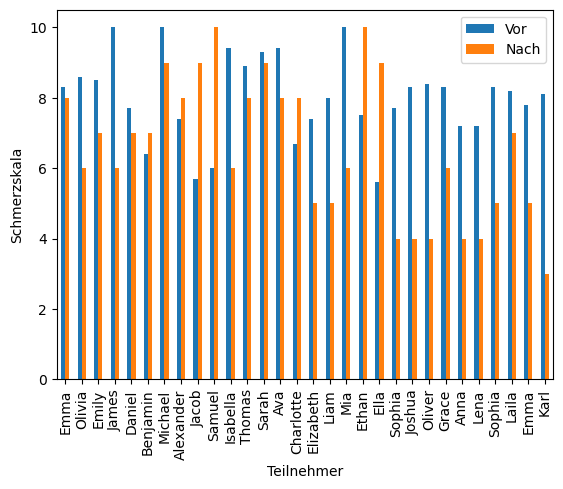

In [17]:
ax = trial_data.plot.bar()
plt.xlabel("Teilnehmer")
plt.ylabel("Schmerzskala")
plt.show()

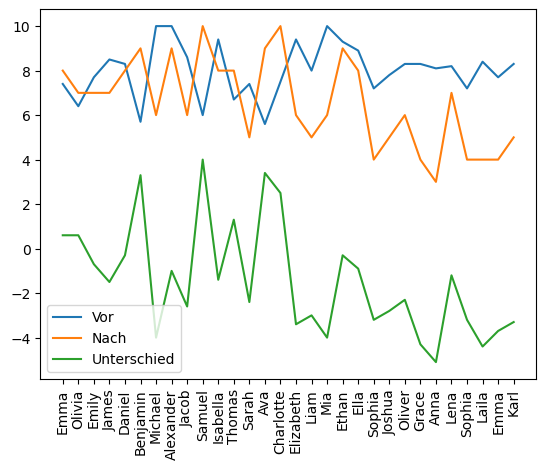

In [38]:
ax = trial_data.sort_values(['Behandlung', 'Name']).plot.line(rot=90)
ax.set_xticks(range(len(trial_data['Name'])))
ax.set_xticklabels(trial_data['Name'])
plt.show()

<Axes: >

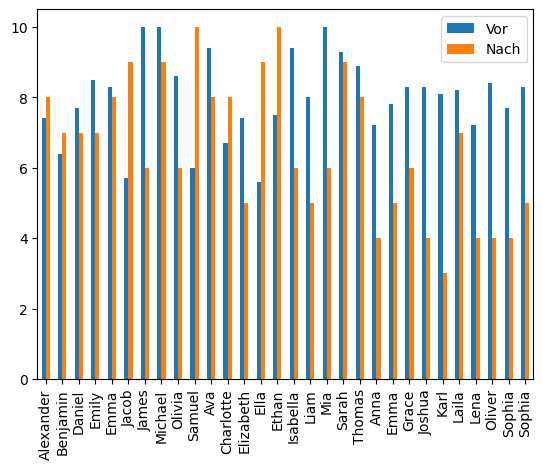

In [19]:
trial_data.sort_values(by=["Behandlung", "Name"]).plot.bar()

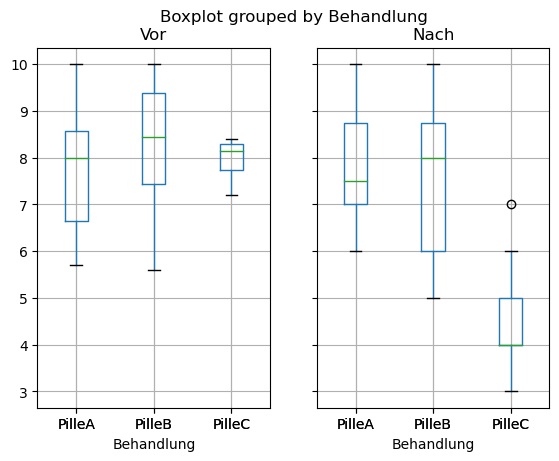

In [20]:
trial_data.boxplot(column=["Vor", "Nach"], by="Behandlung")
plt.show()

## Mit den Daten arbeiten

In [21]:
trial_data["Unterschied"] = trial_data["Nach"] - trial_data["Vor"]
print(trial_data)

                Name Behandlung   Vor  Nach  Unterschied
Emma            Emma     PilleA   8.3   8.0         -0.3
Olivia        Olivia     PilleA   8.6   6.0         -2.6
Emily          Emily     PilleA   8.5   7.0         -1.5
James          James     PilleA  10.0   6.0         -4.0
Daniel        Daniel     PilleA   7.7   7.0         -0.7
Benjamin    Benjamin     PilleA   6.4   7.0          0.6
Michael      Michael     PilleA  10.0   9.0         -1.0
Alexander  Alexander     PilleA   7.4   8.0          0.6
Jacob          Jacob     PilleA   5.7   9.0          3.3
Samuel        Samuel     PilleA   6.0  10.0          4.0
Isabella    Isabella     PilleB   9.4   6.0         -3.4
Thomas        Thomas     PilleB   8.9   8.0         -0.9
Sarah          Sarah     PilleB   9.3   9.0         -0.3
Ava              Ava     PilleB   9.4   8.0         -1.4
Charlotte  Charlotte     PilleB   6.7   8.0          1.3
Elizabeth  Elizabeth     PilleB   7.4   5.0         -2.4
Liam            Liam     PilleB

In [22]:
trial_data.sort_values("Unterschied", ascending=False)

,Name,Behandlung,Vor,Nach,Unterschied
Samuel,Samuel,PilleA,6.0,10.0,4.0
Ella,Ella,PilleB,5.6,9.0,3.4
Jacob,Jacob,PilleA,5.7,9.0,3.3
Ethan,Ethan,PilleB,7.5,10.0,2.5
Charlotte,Charlotte,PilleB,6.7,8.0,1.3
Benjamin,Benjamin,PilleA,6.4,7.0,0.6
Alexander,Alexander,PilleA,7.4,8.0,0.6
Emma,Emma,PilleA,8.3,8.0,-0.3
Sarah,Sarah,PilleB,9.3,9.0,-0.3
Daniel,Daniel,PilleA,7.7,7.0,-0.7


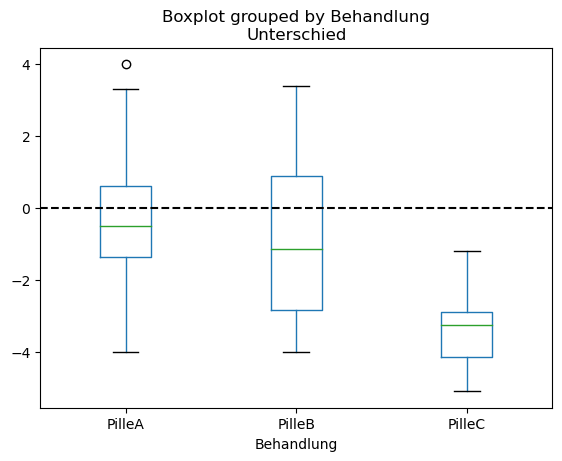

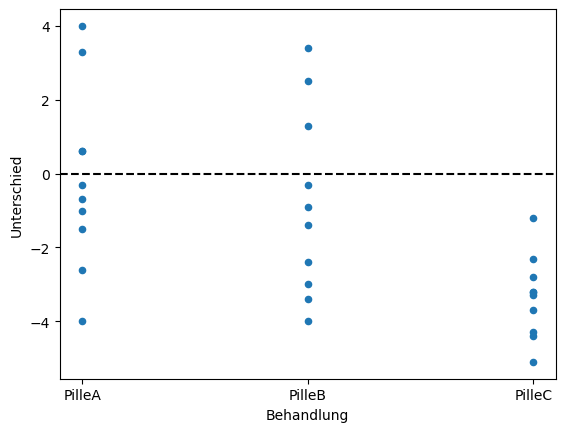

In [23]:
trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
trial_data.plot.scatter("Behandlung", "Unterschied")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()

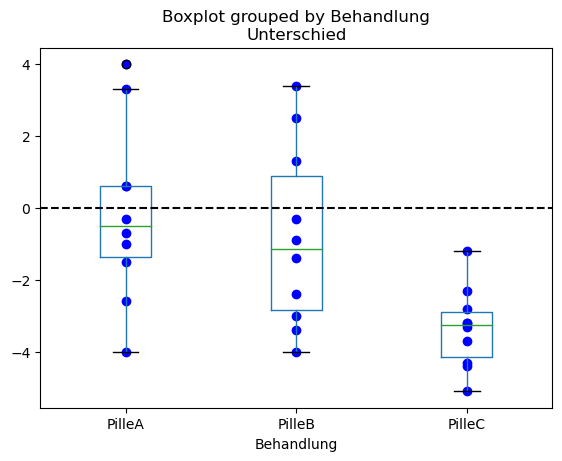

In [24]:
p = trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
for b, d in enumerate(trial_data["Unterschied"]):
    behandlung = trial_data["Behandlung"][b]
    if behandlung == "PilleA":
        x = 1
    elif behandlung == "PilleB":
        x = 2
    elif behandlung == "PilleC":
        x = 3
    plt.scatter(x, d, c="blue")
plt.show()

In [25]:
## density plot is not supported by Jupyter
## trial_pivot = trial_data.reset_index().pivot(columns="Behandlung", values="Unterschied")
## trial_pivot.plot.density()
## plt.axvline(x=0, c="k", linestyle="--")
## plt.show()

## Eine kleine statistische Analyse

In [26]:
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [27]:
pille_effect = ols('Unterschied ~ Behandlung', data = trial_data).fit()
print(pille_effect.summary())

                            OLS Regression Results                            
Dep. Variable:            Unterschied   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6.216
Date:                Wed, 08 Nov 2023   Prob (F-statistic):            0.00602
Time:                        16:29:05   Log-Likelihood:                -63.753
No. Observations:                  30   AIC:                             133.5
Df Residuals:                      27   BIC:                             137.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1600 

In [28]:
table = sma.stats.anova_lm(pille_effect)
print(table)

              df      sum_sq    mean_sq         F    PR(>F)
Behandlung   2.0   56.708667  28.354333  6.215784  0.006019
Residual    27.0  123.165000   4.561667       NaN       NaN


## Die Daten exportieren

In [29]:
trial_data[['Behandlung', 'Vor', 'Nach']].to_csv("20231108-simulated-trial-data.tsv", sep="\t", index=False)

## Fragen

1. Wer glaubt, dass ihre/sein Pille hat funktioniert für sie/ihn? Wer glaubt, dass die Pille nicht funktioniert hat?
2. Wenn wir davon ausgehen, dass Pille A, Pille B, Pille C jeweilse Placebo, ein neu Medikament von einer niedriger Dose, und das selbe neue Medikament von einer höheren Dose sind. Welche Schlussfolgerungen können wir ziehen?
3. Um das Medikament zu mehr Patienten bringen, worauf müssen wir noch beachten?
4. Was können wir noch mit den Daten machen?